## Observations and Insights 

In [ ]:
#Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as nps 


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combined_df
# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].count()
mouse_count

1893

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseid_duplicates = combined_df[combined_df.duplicated(["Mouse ID"])]
mouseid_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df = combined_df.loc[combined_df['Mouse ID'] != '989']
combined_df
clean_df = combined_df
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = clean_df["Mouse ID"].count()
new_mouse_count

1893

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

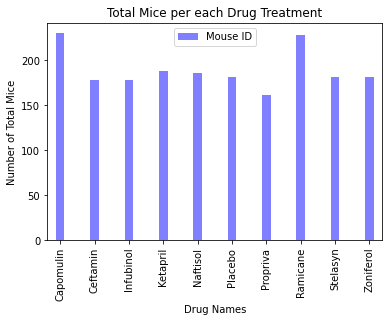

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drugname_group = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
drugname_mouse = drugname_group[["Drug Regimen", "Mouse ID"]]
drugname_mouse = drugname_mouse.set_index("Drug Regimen")

drugname_mouse.plot(kind="bar", color = "blue", alpha=0.5, align="center", width=.25)

plt.title("Total Mice per each Drug Treatment")
plt.xlabel("Drug Names")
plt.ylabel("Number of Total Mice")

plt.show()
plt.tight_layout()

plt.savefig("../Images/pandas_bar.png")

In [17]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
%matplotlib notebook

mouse_count = (clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mouse_count

x_axis = np.arange(len(summary_df))
x_axis

plt.bar(x_axis, mouse_count, color = "b", alpha=0.5, align="center", width=.25)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])
plt.xticks(rotation="vertical")

plt.title("Total Mice per each Drug Treatment")
plt.xlabel("Drug Names")
plt.ylabel("Number of Total Mice")

plt.show()
plt.tight_layout()

plt.savefig("../Images/pyplot_bar.png")

NameError: name 'np' is not defined

<IPython.core.display.Javascript object>


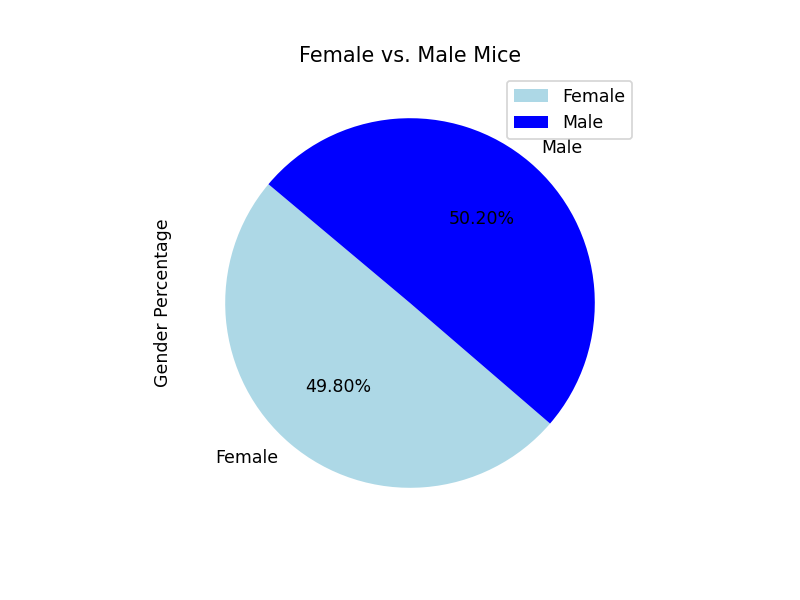

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = clean_df.groupby(["Mouse ID","Sex"])
gender_groups

gender_df = pd.DataFrame(gender_groups.size())

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
total_count = mouse_gender["Total Count"]
gender_sum = mouse_gender["Total Count"].sum()
gender_sum

mouse_gender["Gender Percentage"] = (total_count/gender_sum)*100

plot = mouse_gender.plot.pie(y='Gender Percentage', title= 'Female vs. Male Mice', colors = ['lightblue', 'blue'], startangle=140, shadow = False, autopct="%1.2f%%")

plt.savefig("../Images/pandas_pie.png")

<IPython.core.display.Javascript object>


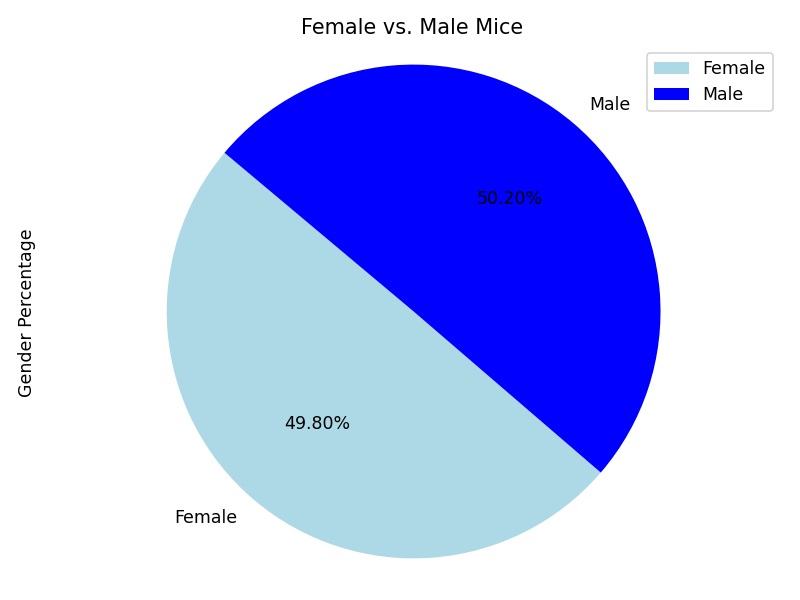

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook 

labels = ["Female","Male"]

sizes = [49.799197,50.200803]

plt.pie(sizes, labels=labels, colors=['lightblue', 'blue'], autopct="%1.2f%%", shadow=False, startangle=140)

plt.axis("equal")

plt.title("Female vs. Male Mice")
plt.ylabel('Gender Percentage')
plt.legend(loc="upper right")
plt.tight_layout()

plt.savefig("../Images/pyplot.pie.png")

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_greatest = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
tumor_greatest = tumor_greatest.sort_values(["Timepoint"], ascending=False)
tumor_greatest
merged_df = tumor_greatest[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
merged_df.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
capomulin= merged.loc[merged['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merged.loc[merged['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merged.loc[merged['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merged.loc[merged['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
#Capomulin
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr_cap= upper_cap-lower_cap
lowout_cap= lower_cap-(1.5*iqr_cap)
upout_cap= upper_cap+(1.5*iqr_cap)
#Ramicane
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr_ram= upper_ram-lower_ram
lowout_ram= lower_ram-(1.5*iqr_ram)
upout_ram= upper_ram+(1.5*iqr_ram)
#Infubinol
quartile_inbol= infubinol.quantile([.25,.5,.75])
lower_inbol= quartile_inbol[.25]
upper_inbol=quartile_inbol[.75]
iqr_inbol= upper_inbol-lower_inbol
lowout_inbol= lower_inbol-(1.5*iqr_inbol)
upout_inbol= upper_inbol+(1.5*iqr_inbol)
#Ceftamin
quartile_ceft= ceftamin.quantile([.25,.5,.75])
lower_ceft= quartile_ceft[.25]
upper_ceft=quartile_ceft[.75]
iqr_ceft= upper_ceft-lower_ceft
lowout_ceft= lower_ceft-(1.5*iqr_ceft)
upout_ceft= upper_ceft+(1.5*iqr_ceft)
print(f"Below {round(lowout_cap, 2)} is an outlier for Capomulin")
print(f"Above {round(upout_cap, 2)} is an outlier for Capomulin")
print(f"Below {round(lowout_ram, 2)} is an outlier for Ramicane")
print(f"Above {round(upout_ram, 2)} is an outlier for Ramicane")
print(f"Below {round(lowout_inbol, 2)} is an outlier for Infubinol")
print(f"Above {round(upout_inbol, 2)} is an outlier for Infubinol")
print(f"Below {round(lowout_ceft, 2)} is an outlier for Ceftamin")
print(f"Above {round(upout_ceft, 2)} is an outlier for Ceftamin")

NameError: name 'merged' is not defined

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
%matplotlib notebook

boxedplot = dict(markerfacecolor='crimson',markersize=12)
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= boxedplot)
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimens")
plt.show()

plt.savefig("../Images/boxplot.png")

NameError: name 'capomulin' is not defined

## Line and Scatter Plots

<IPython.core.display.Javascript object>


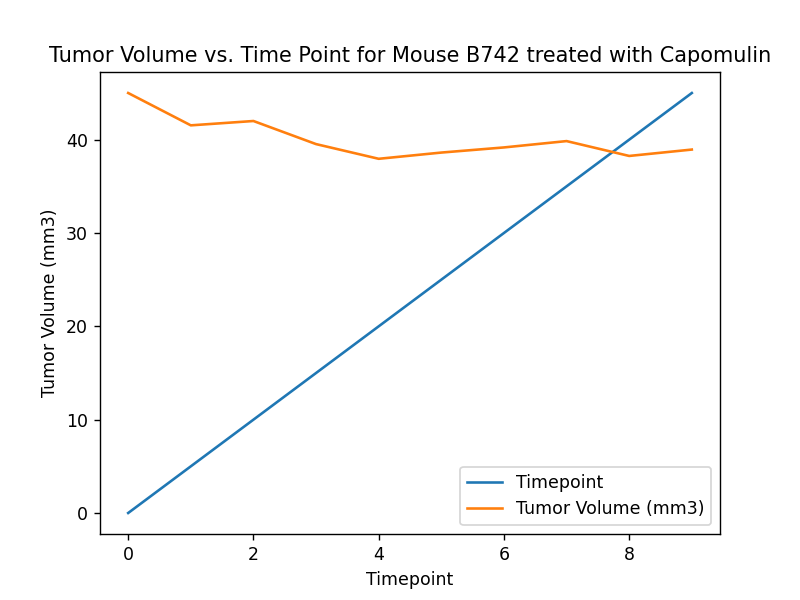

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_capomulin = clean_df[clean_df["Mouse ID"].isin(["b742"])]
mouse_capomulin

time_tumor_data = mouse_capomulin[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_tumor_data

timetumor_df = time_tumor_data.reset_index()
timetumor_df

timetumor_lineplot_df = timetumor_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
timetumor_lineplot_df

timetumor_lineplot_df.plot.line()

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Time Point for Mouse B742 treated with Capomulin")

plt.savefig("../Images/lineplot.png")

<IPython.core.display.Javascript object>


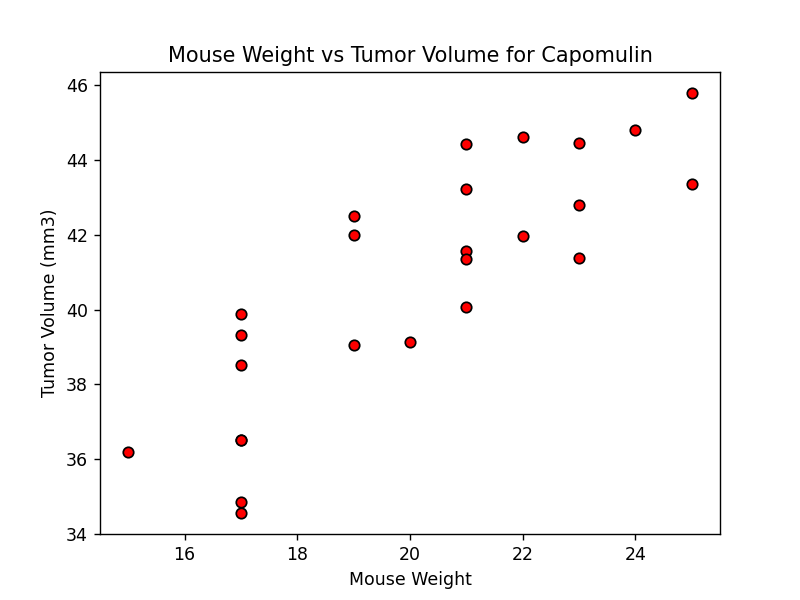

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
%matplotlib notebook

captabs= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capmean=captabs.groupby(["Mouse ID"]).mean()
plt.scatter(capmean["Weight (g)"],capmean["Tumor Volume (mm3)"],facecolors="red", edgecolors="black")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume for Capomulin")
plt.show()

plt.savefig("../Images/scatter.png")

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


<IPython.core.display.Javascript object>


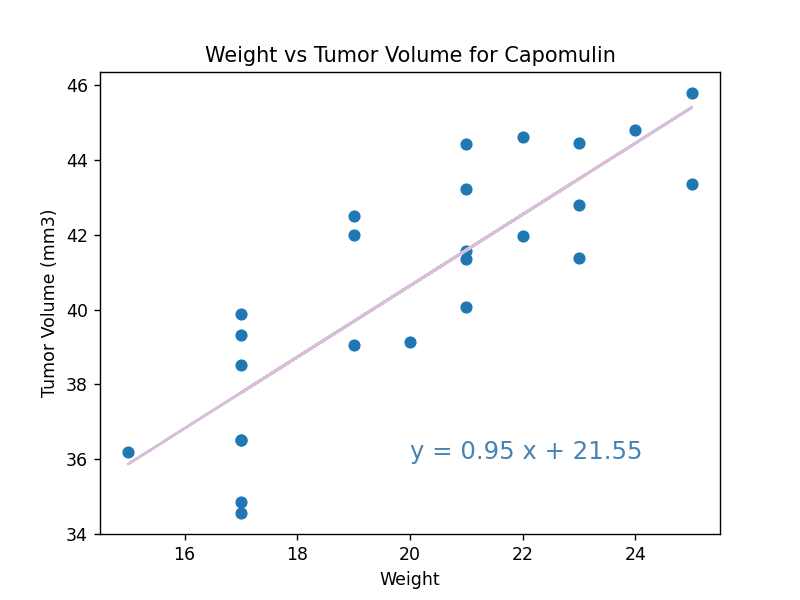

In [27]:
%matplotlib notebook
from scipy.stats import linregress

(slope, intercept,rvalue, pvalue, stderr)= linregress(capmean["Weight (g)"],capmean["Tumor Volume (mm3)"])
regress_values=capmean["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(capmean["Weight (g)"],capmean["Tumor Volume (mm3)"] )
plt.plot(capmean["Weight (g)"], regress_values, color='thistle')
plt.annotate(line_eq,(20,36), color='steelblue', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

plt.savefig("../Images/regression.png")